Let's First write the code for Gradient Regressor in 2D which will give us intution for Gradient Descent in Higher Dimensions

Gradient Descent Just Follows the update Rule Aiming at minimizing the Loss Function.

Let's take the loss function as sum(yactual-ypredicted)^2

Update Rule in 2D:

m(new)=m(old)-lr*sum((yi-mxi-b)*xi)

b(new)=b(old)-lr*sum((yi-mxi-b))

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
class GDRegressor2D:
    def __init__(self,lr=0.01,epochs=100):
        self.lr=lr
        self.epochs=epochs
        self.m=0
        self.b=0
    def fit(self,X_train,y_train):
        X_train = X_train.ravel()
        y_train = y_train.ravel()
        for i in range(self.epochs):
            suma=0
            sumb=0
            for x,y in zip(X_train,y_train):
                suma=suma+(y-self.m*x-self.b)*x
                sumb=sumb+(y-self.m*x-self.b)
            self.m=self.m+(2*self.lr*suma/len(X_train))
            self.b=self.b+(2*self.lr*sumb/len(X_train))
        

In [81]:
from sklearn.datasets import make_regression
X,y=make_regression(n_features=1,n_informative=1,n_targets=1,noise=30,random_state=20)
y

array([-161.89191977,   14.41232113, -181.16308823,  162.95700173,
          8.29246419,  -54.10479379,  149.03982141, -127.71302944,
          4.69430907,  -85.44016791,  -20.27192788,   65.76999775,
        -39.25793656,  178.83132087,  201.62000762,   -6.10993829,
        -24.77657937,  176.15529343,   17.61622458, -197.50600588,
          4.82526892,  -17.00167943,   14.15566644,   28.03696814,
        -93.68779002,   50.04267563, -129.89587417,   59.33832119,
          9.22485115, -172.93064614, -182.37239913, -124.25660929,
         59.9020774 ,   61.8782475 ,  119.78804118,  101.09800152,
        -26.03892162,  -74.97391621, -143.97442746,  104.34888635,
         74.53371344,  -26.83987322, -107.17415717,  -49.55860529,
         58.15488275, -144.10920405,   87.92447484,  -75.64145819,
         87.71075359,   -2.23351036,  -33.58050044,  -74.86335662,
        -69.60474484,   26.20437821,  -57.52977262,  117.32883663,
         10.08272924,   33.75450025, -143.11022331,  166.38099

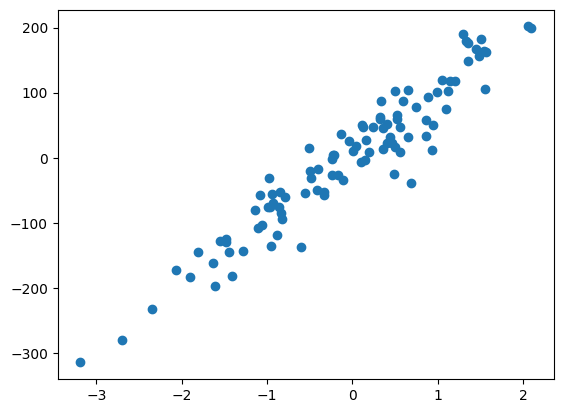

In [82]:
plt.scatter(X,y)

In [83]:
gd=GDRegressor2D(epochs=500)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_

np.float64(4.644570083948468)

In [84]:
lr.coef_

array([96.30200802])

In [85]:
gd.fit(X_train,y_train)
gd.b

np.float64(4.64514857652777)

In [86]:
gd.m

np.float64(96.30117177673385)

Here We can see that we are able to reach near about the parameters obtained by Linear regression by lesser number of operations which is optimized for large parameters

Now let's proceed toward Multiple dimensions

In [87]:
class GDRegressorND:
    def __init__(self,lr=0.01,epochs=100):
        self.lr=lr
        self.epochs=epochs
        self.m=np.array([])
        self.b=0
    def fit(self,X_train,y_train):
        self.m=np.zeros(X_train.shape[1])
        for i in range(self.epochs):
            preds=self.predict(X_train)
            self.m=self.m+(2*self.lr*(X_train.T).dot(y_train-preds)/X_train.shape[0])
            self.b=self.b+(2*self.lr*np.sum((y_train-preds))/X_train.shape[0])
    def predict(self,X_test):
        return X_test.dot(self.m)+self.b

In [88]:
X,y=make_regression(n_features=5,n_informative=5,n_targets=1,noise=30,random_state=20)
y
gd=GDRegressorND(epochs=500)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_

np.float64(0.709762043241021)

In [89]:
lr.coef_

array([ 7.55904314, 43.76658169, 67.06667842, 75.16284213, 12.99697395])

In [90]:
gd.fit(X_train,y_train)
gd.b

np.float64(0.6922750653223974)

In [91]:
gd.m

array([ 7.57179062, 43.77593473, 67.04377325, 75.14666831, 12.99180247])

And here we can see that for N dims also we are getting almost same parameters as Linear Regression with fewer computations

Now Let's Implement Stochastic Gradient Descent

In [92]:
class SGDRegress:
    def __init__(self,lr=0.01,epochs=100):
        self.lr=lr
        self.epochs=epochs
        self.m=np.array([])
        self.b=0
    def fit(self,X_train,y_train):
        self.m=np.zeros(X_train.shape[1])
        inds=[i for i in range(0,X_train.shape[0])]
        for i in range(self.epochs):
            np.random.shuffle(inds)
            for j in inds:
                preds=self.predict(X_train[j])
                self.m=self.m+(2*self.lr*(X_train[j])*(y_train[j]-preds))
                self.b=self.b+(2*self.lr*(y_train[j]-preds))
    def predict(self,X_test):
        return X_test.dot(self.m)+self.b
X,y=make_regression(n_features=5,n_informative=5,n_targets=1,noise=30,random_state=20)
y
gd=SGDRegress(lr=0.001,epochs=500)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_

np.float64(0.709762043241021)

In [93]:
lr.coef_

array([ 7.55904314, 43.76658169, 67.06667842, 75.16284213, 12.99697395])

In [94]:
gd.fit(X_train,y_train)
gd.b

np.float64(0.7847022059912423)

In [95]:
gd.m

array([ 7.54845127, 43.79890198, 67.07442122, 75.1225963 , 12.95792949])

In SGD we just find the values at random points instead of reading the whole dataset at once and we see that we are able to reach optima in fewer epochs and less memory req.

Let's Proceed toward Mini Batch Gradient Descent.

In [96]:
import random
class MiniGDRegressorND:
    def __init__(self,lr=0.01,epochs=100,batch_size=50):
        self.lr=lr
        self.epochs=epochs
        self.m=np.array([])
        self.b=0
        self.batch_size=batch_size
    def fit(self,X_train,y_train):
        self.m=np.zeros(X_train.shape[1])
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                indices=random.sample(range(X_train.shape[0]),self.batch_size)
                preds=self.predict(X_train[indices])
                self.m=self.m+(2*self.lr*(X_train[indices].T).dot(y_train[indices]-preds)/self.batch_size)
                self.b=self.b+(2*self.lr*np.sum((y_train[indices]-preds))/X_train.shape[0])
    def predict(self,X_test):
        return X_test.dot(self.m)+self.b
X,y=make_regression(n_features=5,n_informative=5,n_targets=1,noise=30,random_state=10,n_samples=1000)
y
gd=MiniGDRegressorND(lr=0.001,epochs=500)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_

np.float64(-0.3687282559442169)

In [97]:
lr.coef_

array([ 0.52526135, 52.45802546, 34.7659544 , 96.52372236, 14.7662293 ])

In [98]:
gd.fit(X_train,y_train)
print(gd.m)
print(gd.b)

[ 0.5718979  52.50384128 34.90556207 96.52480379 14.8268236 ]
-0.3753545763002717


Here we are able to reach minima using Mini Batch GD also which is medium between Batch GD and Stochastic GD
